In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Data Collection

In [9]:
crime = pd.read_csv("../Clustering/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Exploratory data analysis

In [10]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Normalizing data for any type of clustering

In [11]:
# Normalization function 
def norm_func(i):
   x = (i-i.min())/(i.max()-i.min())
   return (x)

In [12]:
#normalized dataframe
df_norm = norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


Hierarchical Clustering

In [13]:
from scipy.cluster.hierarchy import linkage 

import scipy.cluster.hierarchy as sch # for creating dendrogram 
type(df_norm)

pandas.core.frame.DataFrame

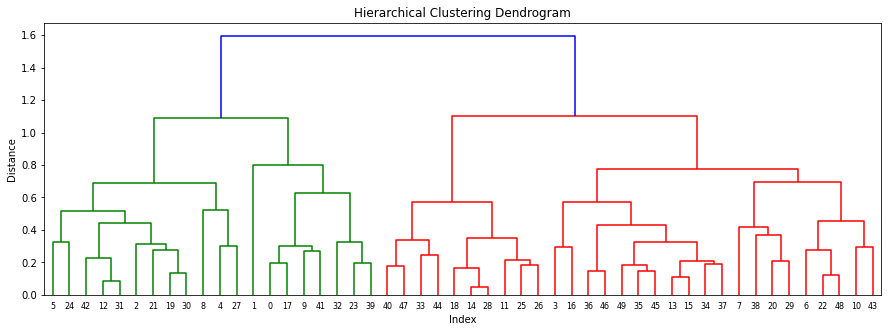

In [14]:
#Dendogram
z = linkage(df_norm, method="complete",metric="euclidean")

plt.figure(figsize=(15, 5));
plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


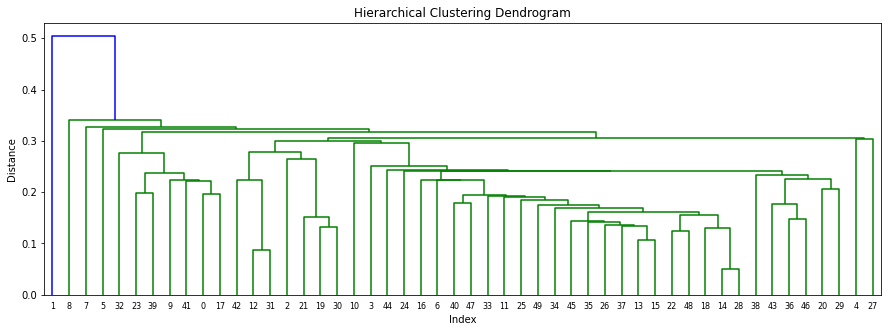

In [8]:
#Dendogram
z = linkage(df_norm, method="single",metric="euclidean")

plt.figure(figsize=(15, 5));
plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

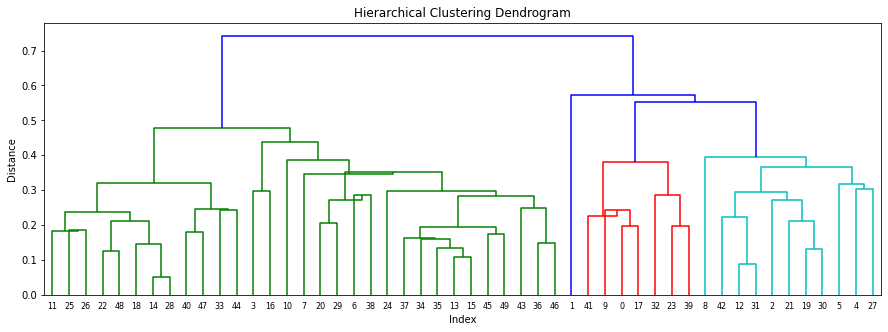

In [15]:
# Create Dendogram
z = linkage(df_norm, method="centroid",metric="euclidean")

plt.figure(figsize=(15, 5));
plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

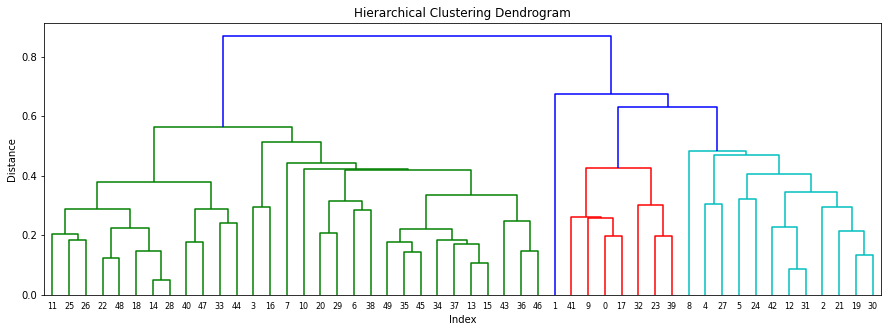

In [10]:
# Create Dendogram
z = linkage(df_norm, method="average",metric="euclidean")

plt.figure(figsize=(15, 5));
plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [16]:
# Apply Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(df_norm)

In [17]:
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels.head()

0    0
1    0
2    0
3    1
4    0
dtype: int64

In [18]:
crime['cluster']=cluster_labels # creating a  new column and assigning it to new column 
crime = crime.iloc[:,[5,0,1,2,3,4]]

# getting aggregate mean of each cluster
crime.iloc[:,2:].groupby(crime.cluster).median()
crime.head()


,cluster,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,0,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,0,California,9.0,276,91,40.6


In [14]:
# creating a csv file 
crime.to_csv("crime_hierarchical.csv",encoding="utf-8")

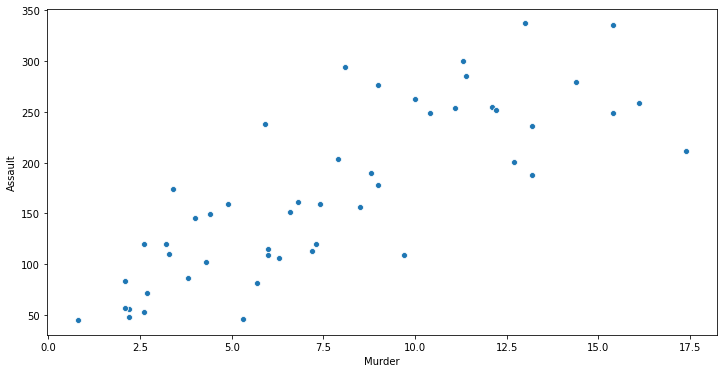

In [21]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Assault'])

In [23]:
crime[crime['cluster']==0]

,cluster,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,0,Arizona,8.1,294,80,31.0
4,0,California,9.0,276,91,40.6
5,0,Colorado,7.9,204,78,38.7
8,0,Florida,15.4,335,80,31.9
9,0,Georgia,17.4,211,60,25.8
12,0,Illinois,10.4,249,83,24.0
17,0,Louisiana,15.4,249,66,22.2
19,0,Maryland,11.3,300,67,27.8


In [ ]:
Insights
Cluster 2 - south western states (however, definition changes for different sources) maxes out in three (Assault, Urbanpop, Rape) out of four crimes.
Cluster 3 stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes
Coincidentally, most of the southern region states belong to cluster 1 where Murders seems to be popular.
The southern states in cluster 3 have more number of average arrests/ 100,000 persons in all the three crime categories than states (half of mid-western states) in cluster 1 in spite of the average Urbanpop (%) being very close. For causality, more variables are needed apart from the number of arrests to understand the inferences like the above. For instance, it could be the density of people or number of people with a different socio-economic statuses in that state.
